In [1]:
import pandas as pd
import numpy as np

Part 1: Basic function

In [2]:
def warmUpExercice() -> np.array:
    return np.eye(5)

In [3]:
#Running warmUpExercice
# 5x5 Identity matrix
warmUpExercice()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

Part 2: Plotting

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
def plotData(X: np.array, y: np.array) -> None:
    plt.scatter(x=X,y=y, marker='x',c='r')
    plt.xlabel("Population of City in 10,000s")
    plt.ylabel("Profit in $10,000s")

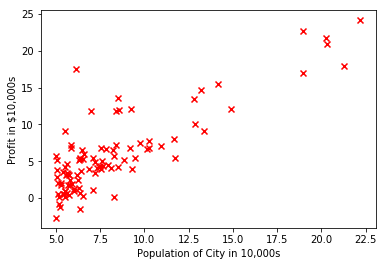

In [5]:
data = pd.read_csv('ex1Data1.txt',header=None) 
X = data.iloc[:,0].values
y = data.iloc[:,1].values
m = len(y)
plotData(X, y)

Part 3: Cost and gradient descent

In [6]:
def ComputeCost(X: np.array, y: np.array, theta: np.array) -> float:
    m = len(y) + 0.0
    temp_vector = X.dot(theta) - y
    return 1/(2*m)*temp_vector.T.dot(temp_vector)

In [8]:
X = np.c_[np.ones(m),data.iloc[:,0].values] #Add columns of ones to X
theta = np.zeros(2) # Initialize fitting parameters

# Testing cost function
J = ComputeCost(X, y, theta)
print('With theta = [0 ; 0]\nCost computed = {:.2f}'.format(J));
print('Expected cost = 32.07 ')


# Further testing
theta = np.array([-1,2])
J = ComputeCost(X, y, theta)
print('\nWith theta = [-1 ; 2]\nCost computed = {:.2f}'.format(J));
print('Expected cost value (approx) 54.24\n');

With theta = [0 ; 0]
Cost computed = 32.07
Expected cost = 32.07 

With theta = [-1 ; 2]
Cost computed = 54.24
Expected cost value (approx) 54.24



In [18]:
def GradientDescent(X: np.array, y: np.array, theta: np.array, alpha: float, num_iter: int) -> (np.array, np.array):
    J_history = np.zeros(num_iter)
    theta_histo = np.zeros(num_iter*len(theta)).reshape(num_iter,len(theta))
    m = len(y)
    for i in range(num_iter):
        temp_vector = X.dot(theta) - y
        gradient = 1/m * X.T.dot(temp_vector) 
        theta = theta - alpha*gradient
        J_history[i] = ComputeCost(X,y,theta)
        theta_histo[i,:] = theta
    theta = theta
    return theta, J_history, theta_histo

In [46]:
# Some gradient descent settings
iterations = 150000
alpha = 0.001

# Running gradient descent
theta = np.array([9,3])
theta, J_history, theta_histo = GradientDescent(X=X,y=y,theta=theta,alpha=alpha,num_iter=iterations)
print('Theta found by gradient descent:\n');
print(theta);
# These are the values in the exercices, but it is possible to get a better result increasing the iterations
print('Expected theta values (approx)\n');
print(' -3.6303\n  1.1664\n\n');

Theta found by gradient descent:

[-3.89578088  1.19303364]
Expected theta values (approx)

 -3.6303
  1.1664




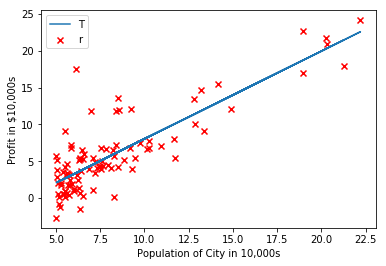

In [12]:
plotData(X[:,1],y)
plt.plot(X[:,1], X.dot(theta))
plt.legend('Training Data')

In [13]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.array([1, 3.5]).dot(theta)
print('For population = 35,000, we predict a profit of {:.0f}'.format(predict1*10000))
predict2 = np.array([1, 7]).dot(theta);
print('For population = 70,000, we predict a profit of {:.0f}'.format(predict2*10000))


For population = 35,000, we predict a profit of 2798
For population = 70,000, we predict a profit of 44555


In [30]:
theta0_vals = np.linspace(-10,10,100)
theta1_vals = np.linspace(-1,4,100)
J_vals = np.zeros(len(theta0_vals)*len(theta1_vals)).reshape(len(theta0_vals),len(theta1_vals))
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        temp_theta = np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[i,j] = ComputeCost(X,y,temp_theta)


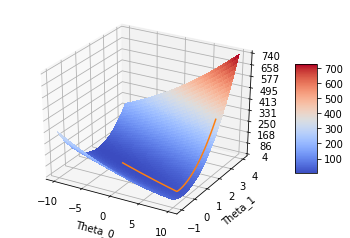

In [47]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm # color
from matplotlib.ticker import LinearLocator, FormatStrFormatter

X_fig, Y_fig = np.meshgrid(theta0_vals, theta1_vals)
fig = plt.figure()
ax = fig.gca(projection='3d')

#Need to use the transpose of J_vals because of the way meshgrid works
surf = ax.plot_surface(X_fig, Y_fig, J_vals.T, cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.xlabel("Theta_0")
plt.ylabel("Theta_1")

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.0f'))
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.plot(theta_histo[:,0],theta_histo[:,1],J_history)

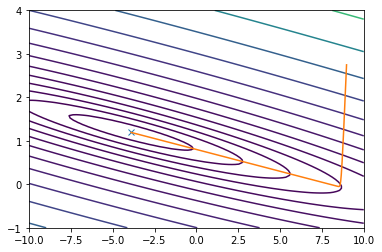

In [48]:
plt.contour(X_fig, Y_fig, J_vals.T,np.logspace(-2,3,30))
plt.plot(theta[0],theta[1],marker='x')
plt.plot(theta_histo[:,0],theta_histo[:,1])